# Search Algorithm: 2048 Puzzle

---

This notebook covers basic search algorithms for **Path-Finding in the 2048 Puzzle**.

We will explore *uninformed search* algorithms like breadth-first search (BFS), depth-first search (DFS), depth-limited search (DLS), iterative deepening search (IDS), and uniform cost search (UCS), as well as *informed search* algorithms like greedy best-first search (GBFS) and A* search.

The setup involves starting with a near-winning condition in the 2048 game and solving for the goal state where the 2048 tile is reached on the board.

---

### Essential Libraries

Let us begin by importing the essential Python libraries.

In [3]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque  # Ensure this import is included

### Helper Functions for the 2048 Game

These are just a few helper functions for you to work with the 2048 game easily, and to visualize it in a nice way. **No need to edit in general.**


Current state of the board:
0     0     0     2    
0     0     0     0    
2     0     0     0    
0     0     0     0    



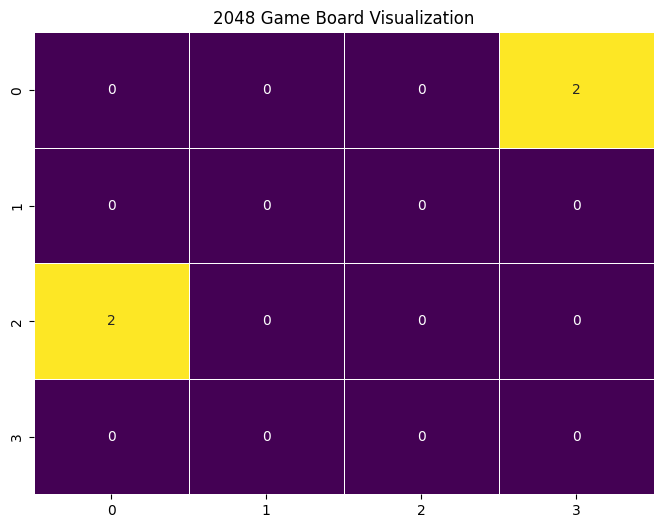

In [ ]:
def initialize_game():
    """Initializes a 4x4 grid for 2048 game with two tiles placed at random."""
    board = np.zeros((4, 4), dtype=int)
    add_new_tile(board)
    add_new_tile(board)
    return board

def add_new_tile(board):
    """Adds a new tile (2 or 4) to a random empty spot on the board."""
    empty_cells = [(i, j) for i in range(4) for j in range(4) if board[i][j] == 0]
    if empty_cells:
        i, j = random.choice(empty_cells)
        board[i][j] = 2 if random.random() < 0.9 else 4

def print_board(board):
    """Prints the board in a more readable format."""
    print("Current state of the board:")
    for row in board:
        print(" ".join(str(x).ljust(5) for x in row))
    print()

def visualize_board(board):
    """Visualizes the board using a heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(board, annot=True, fmt="d", cmap="viridis", cbar=False, linewidths=.5)
    plt.title("2048 Game Board Visualization")
    plt.show()

# Example usage:
np.random.seed(0)  # For reproducible random choices (optional)
board = initialize_game()
print_board(board)
visualize_board(board)

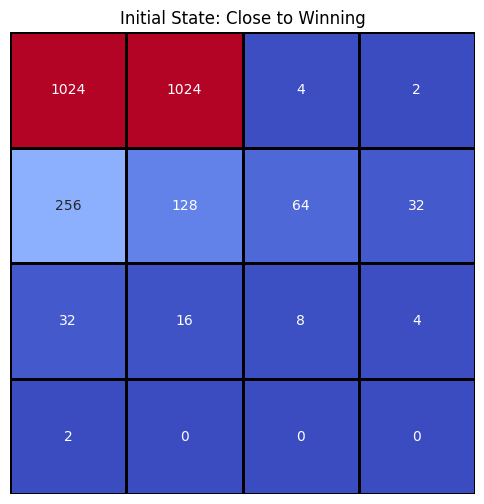

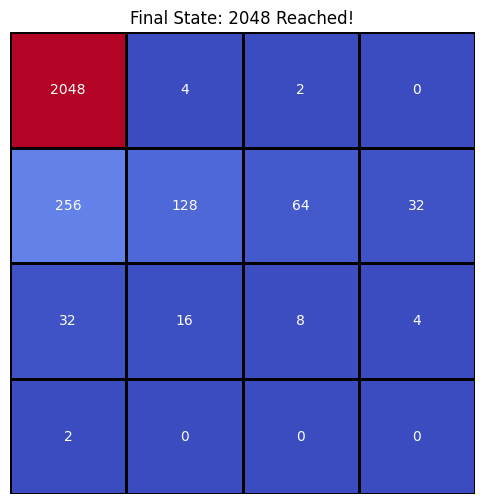

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initialize_custom_game():
    # Starting with a board that's close to winning for demonstration
    board = np.array([
        [1024, 1024, 4, 2],
        [256, 128, 64, 32],
        [32, 16, 8, 4],
        [2, 0, 0, 0]
    ])
    return board

def slide_left(board):
    """Slides all tiles to the left and combines them according to the 2048 rules."""
    new_board, changed = np.zeros_like(board), False
    for i in range(4):
        temp = board[i][board[i] != 0]  # Remove zeros
        combined = []
        skip = False
        for j in range(len(temp)):
            if not skip:
                if j + 1 < len(temp) and temp[j] == temp[j + 1]:
                    combined.append(2 * temp[j])
                    skip = True
                    changed = True
                else:
                    combined.append(temp[j])
            else:
                skip = False
        new_board[i, :len(combined)] = combined
    return new_board, changed

def simulate_manual_moves(initial_board):
    board, _ = slide_left(initial_board)  # Combine the two 1024 tiles to make 2048
    return board

def display_board(board, title="Game State"):
    plt.figure(figsize=(6, 6))
    sns.heatmap(board, annot=True, fmt="d", cmap='coolwarm', cbar=False, linewidths=1, linecolor='black')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Initialize a custom game state close to winning
board = initialize_custom_game()
display_board(board, "Initial State: Close to Winning")

# Simulate a move that leads to winning
final_board = simulate_manual_moves(board)
display_board(final_board, "Final State: 2048 Reached!")


### Breadth-First-Search (BFS)

**Uninformed Search**: Focuses on the graph structure and not the *cost from start* or *distance from goal*.

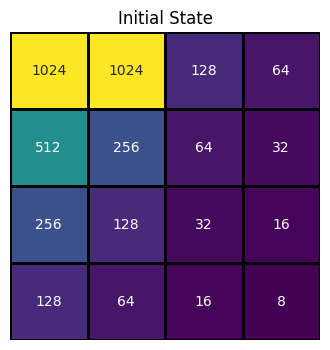

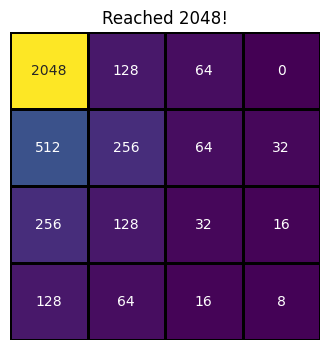

Solution path: ['Left']
Solution path to reach 2048 (if found): ['Left']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

def initialize_game():
    # Setting up a board close to winning to demonstrate the search reaching 2048.
    board = np.array([[1024, 1024, 128, 64],
                      [512, 256, 64, 32],
                      [256, 128, 32, 16],
                      [128, 64, 16, 8]])
    return board

def slide_left(board):
    new_board, changed = np.zeros_like(board), False
    for i in range(4):
        clean_row = [v for v in board[i] if v != 0]
        new_row = []
        skip = False
        for j in range(len(clean_row)):
            if not skip:
                if j + 1 < len(clean_row) and clean_row[j] == clean_row[j + 1]:
                    new_row.append(2 * clean_row[j])
                    skip = True
                    changed = True
                else:
                    new_row.append(clean_row[j])
            else:
                skip = False
        new_board[i, :len(new_row)] = new_row
    return new_board, changed

def get_all_moves(board):
    moves = []
    directions = [
        ("Left", lambda b: slide_left(b)),
        ("Right", lambda b: slide_left(np.fliplr(b))),
        ("Up", lambda b: slide_left(b.T)),
        ("Down", lambda b: slide_left(np.fliplr(b.T)))
    ]
    for direction, func in directions:
        new_board, changed = func(board)
        if changed:
            if direction in ["Right", "Down"]:
                new_board = np.fliplr(new_board)
            if direction in ["Up", "Down"]:
                new_board = new_board.T
            moves.append((new_board, direction))
    return moves

def display_board(board, title="Game State"):
    plt.figure(figsize=(4, 4))
    sns.heatmap(board, annot=True, fmt="d", cmap='viridis', cbar=False, linewidths=1, linecolor='black')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def bfs(start_board):
    queue = deque([(start_board, [])])
    visited = set()
    visited.add(start_board.tobytes())
    while queue:
        current_board, path = queue.popleft()
        if np.max(current_board) == 2048:
            display_board(current_board, "Reached 2048!")
            print("Solution path:", path)
            return path
        for new_board, move in get_all_moves(current_board):
            board_bytes = new_board.tobytes()
            if board_bytes not in visited:
                queue.append((new_board, path + [move]))
                visited.add(board_bytes)
    return None

# Testing BFS
initial_board = initialize_game()
display_board(initial_board, "Initial State")
solution_path = bfs(initial_board)
if solution_path:
    print("Solution path to reach 2048 (if found):", solution_path)
else:
    print("No solution found.")


**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

## Breadth-First Search (BFS)

**Completeness:** BFS is complete if the branching factor is finite. In the case of the 2048 game, where the state space is finite and each state has a finite number of successor states, BFS will eventually find a solution if one exists.

**Optimality:** BFS is optimal if the cost of each step is the same. In the context of the 2048 game, where the cost of each move (i.e., transitioning from one state to another) is uniform, BFS will find the shortest solution path.

**Efficiency Improvement:** BFS explores all nodes at a given depth level before proceeding to the next level. However, in some cases, this may lead to inefficient memory usage, especially if the branching factor is high. Using techniques such as iterative deepening or incorporating pruning strategies could enhance efficiency.

---

### Depth-First-Search (DFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

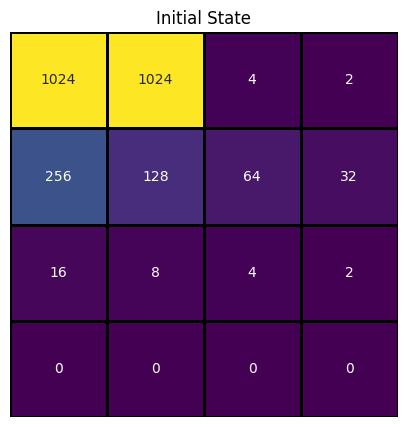

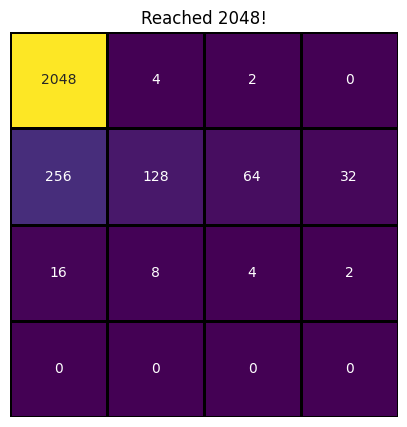

Solution path to reach 2048 (if found): ['Left']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

def initialize_near_win_game():
    # Creating a near-win board state for demonstration
    board = np.array([
        [1024, 1024, 4, 2],
        [256, 128, 64, 32],
        [16, 8, 4, 2],
        [0, 0, 0, 0]
    ])
    return board

def add_new_tile(board):
    empty = np.where(board == 0)
    if len(empty[0]) > 0:
        idx = np.random.choice(len(empty[0]))
        board[empty[0][idx], empty[1][idx]] = 2 if np.random.rand() < 0.9 else 4

def slide_left(board):
    new_board, changed = np.zeros_like(board), False
    for i in range(4):
        filtered = board[i][board[i] != 0]
        merged, skip = [], False
        for j in range(len(filtered)):
            if not skip:
                if j+1 < len(filtered) and filtered[j] == filtered[j+1]:
                    merged.append(2 * filtered[j])
                    skip = True
                    changed = True
                else:
                    merged.append(filtered[j])
            else:
                skip = False
        new_board[i, :len(merged)] = merged
    return new_board, changed

def get_all_moves(board):
    moves = []
    directions = [
        (slide_left, "Left"),
        (lambda b: slide_left(np.fliplr(b)), "Right"),
        (lambda b: slide_left(np.transpose(b)), "Up"),
        (lambda b: slide_left(np.fliplr(np.transpose(b))), "Down")
    ]
    for move_func, name in directions:
        new_board, changed = move_func(board)
        if changed:
            moves.append((new_board, name))
    return moves

def display_board(board, title="Game State"):
    plt.figure(figsize=(5, 5))
    sns.heatmap(board, annot=True, fmt="d", cmap='viridis', cbar=False, linewidths=1, linecolor='black')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def dfs(board, path=[], visited=None, depth=0, max_depth=10000):
    if visited is None:
        visited = set()
    
    board_key = board.tobytes()
    if board_key in visited:
        return None
    visited.add(board_key)

    if np.max(board) == 2048:
        display_board(board, "Reached 2048!")
        return path
    
    if depth < max_depth:
        for new_board, move in get_all_moves(board):
            result = dfs(new_board, path + [move], visited, depth + 1, max_depth)
            if result is not None:
                return result

    return None

# Example usage
initial_board = initialize_near_win_game()
display_board(initial_board, "Initial State")
solution_path = dfs(initial_board)
if solution_path:
    print("Solution path to reach 2048 (if found):", solution_path)
else:
    print("No solution found, or depth limit reached.")


**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

### Depth-First Search (DFS)

**Completeness:** DFS is not complete in infinite state spaces or in cases where there are infinite loops. However, in finite state spaces like the 2048 game, DFS is complete as long as there is no infinite loop.

**Optimality:** DFS is not optimal because it may find a non-optimal solution if it reaches a dead end and backtracks before finding the optimal solution.

**Efficiency Improvement:** Implementing depth-limited search or iterative deepening can mitigate some of the efficiency issues associated with DFS, especially in cases where the depth of the solution path is not known in advance.

---


### Uniform-Cost-Search (UCS)

**Uninformed Search** : Focusses on the graph structure and the *cost from start*, but not the *distance from goal*.

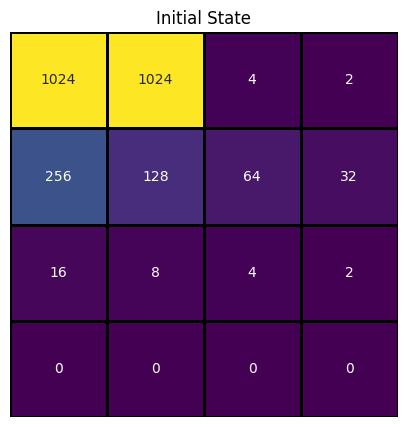

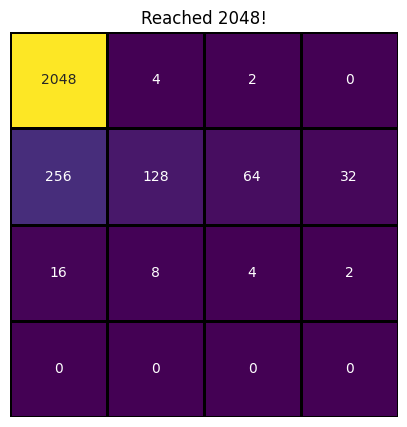

Solution path to reach 2048 (if found): ['Left']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from queue import PriorityQueue
import random

def initialize_near_win_game():
    board = np.array([
        [1024, 1024, 4, 2],
        [256, 128, 64, 32],
        [16, 8, 4, 2],
        [0, 0, 0, 0]
    ])
    return board

def slide_left(board):
    new_board, changed = np.zeros_like(board), False
    for i in range(4):
        filtered = board[i][board[i] != 0]
        merged, skip = [], False
        for j in range(len(filtered)):
            if not skip:
                if j + 1 < len(filtered) and filtered[j] == filtered[j + 1]:
                    merged.append(2 * filtered[j])
                    skip = True
                    changed = True
                else:
                    merged.append(filtered[j])
            else:
                skip = False
        new_board[i, :len(merged)] = merged
    return new_board, changed

def get_all_moves(board):
    moves = []
    directions = [
        (slide_left, "Left"),
        (lambda b: slide_left(np.fliplr(b)), "Right"),
        (lambda b: slide_left(np.transpose(b)), "Up"),
        (lambda b: slide_left(np.fliplr(np.transpose(b))), "Down")
    ]
    for move_func, name in directions:
        new_board, changed = move_func(board)
        if changed:
            moves.append((new_board, name))
    return moves

def display_board(board, title="Game State"):
    plt.figure(figsize=(5, 5))
    sns.heatmap(board, annot=True, fmt="d", cmap='viridis', cbar=False, linewidths=1, linecolor='black')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def uniform_cost_search(initial_board):
    priority_queue = PriorityQueue()
    priority_queue.put((0, initial_board.tobytes(), []))  # Store board as bytes to avoid comparison issues
    visited = set()

    while not priority_queue.empty():
        cost, board_bytes, path = priority_queue.get()
        board = np.frombuffer(board_bytes, dtype=int).reshape(4, 4)  # Reshape back to board

        if np.max(board) == 2048:
            display_board(board, "Reached 2048!")
            return path

        if board_bytes in visited:
            continue
        visited.add(board_bytes)

        for new_board, move in get_all_moves(board):
            new_board_bytes = new_board.tobytes()
            if new_board_bytes not in visited:
                priority_queue.put((cost + 1, new_board_bytes, path + [move]))

    return None

# Example usage
initial_board = initialize_near_win_game()
display_board(initial_board, "Initial State")
solution_path = uniform_cost_search(initial_board)
if solution_path:
    print("Solution path to reach 2048 (if found):", solution_path)
else:
    print("No solution found, or depth limit reached.")


**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

### Uniform Cost Search (UCS)

**Completeness:** Uniform Cost Search (UCS) is complete in finite state spaces if the cost of each step is greater than some minimum positive value, ensuring that it will eventually explore all nodes and find a solution if one exists.

**Optimality:** UCS is optimal if the cost of each step is non-decreasing with each step, meaning that it always selects the path with the lowest cumulative cost. This guarantees finding the optimal solution.

**Efficiency Improvement:** UCS can suffer from inefficiency if the cost of each step varies widely or if there are many nodes with low costs but deep paths. Using techniques such as pruning or incorporating heuristic information can improve efficiency by guiding the search towards more promising paths while still ensuring optimality.


### Depth-limited Seach

**Uninformed Search** : Focuses on the graph structure and the *cost from start*, but not the *distance from goal*.

In [ ]:
import numpy as np
import random
from copy import deepcopy

class Game2048:
    def __init__(self, size=4):
        self.size = size
        self.board = np.zeros((self.size, self.size), dtype=int)
        self.manual_start()

    def manual_start(self):
        # Manually setting a near-win state
        self.board = np.array([
            [1024, 1024, 2, 2],
            [128, 64, 32, 16],
            [8, 4, 2, 0],
            [0, 0, 0, 0]
        ])

    def compress(self, row):
        filtered = [num for num in row if num != 0]
        return filtered + [0] * (len(row) - len(filtered))

    def merge(self, row):
        row = self.compress(row)
        for i in range(len(row) - 1):
            if row[i] == row[i + 1] and row[i] != 0:
                row[i] *= 2
                row[i + 1] = 0
        return self.compress(row)

    def move(self, direction):
        original = deepcopy(self.board)
        rotated = False
        if direction == 'up':
            self.board = np.rot90(self.board, -1)
            rotated = True
        elif direction == 'down':
            self.board = np.rot90(self.board, 1)
            rotated = True
        elif direction == 'right':
            self.board = np.fliplr(self.board)

        for i in range(self.size):
            self.board[i] = self.merge(self.board[i])

        if rotated:
            if direction == 'up':
                self.board = np.rot90(self.board, 1)
            elif direction == 'down':
                self.board = np.rot90(self.board, -1)
        elif direction == 'right':
            self.board = np.fliplr(self.board)

        if not np.array_equal(original, self.board):
            self.add_random_tile()  # Still adding a random tile after manual moves to simulate game progression

    def add_random_tile(self):
        empty_cells = [(i, j) for i in range(self.size) for j in range(self.size) if self.board[i][j] == 0]
        if empty_cells:
            i, j = random.choice(empty_cells)
            self.board[i][j] = 2 if random.random() < 0.9 else 4

    def can_move(self):
        if np.any(self.board == 0):
            return True
        for i in range(self.size):
            for j in range(self.size - 1):
                if self.board[i, j] == self.board[i, j + 1]:
                    return True
                if self.board[j, i] == self.board[j + 1, i]:
                    return True
        return False

    def is_win(self):
        return np.any(self.board == 2048)

    def is_loss(self):
        return not self.can_move()

    def clone(self):
        clone = Game2048(self.size)
        clone.board = deepcopy(self.board)
        return clone

def depth_limited_search(game, depth):
    print(f"Depth: {depth}\n{game.board}\n")
    if game.is_win():
        print("Winning board found:")
        print(game.board)
        return True
    if depth == 0 or game.is_loss():
        return False
    directions = ['up', 'down', 'left', 'right']
    for direction in directions:
        new_game = game.clone()
        new_game.move(direction)
        if depth_limited_search(new_game, depth - 1):
            return True
    return False

# Initialize the game and search
game = Game2048()
print("Initial board set near winning condition:")
print(game.board)

if depth_limited_search(game, 5):
    print("Success: 2048 achieved within depth limit.")
else:
    print("Failure: No solution found within depth limit.")


Initial board set near winning condition:
[[1024 1024    2    2]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    0]]
Depth: 5
[[1024 1024    2    2]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    0]]

Depth: 4
[[   0    0    0    0]
 [1024 1024    2    2]
 [ 128   64   32    2]
 [   8    4    2   16]]

Depth: 3
[[   0    0    0    0]
 [1024 1024    2    2]
 [ 128   64   32    4]
 [   8    4    2   16]]

Depth: 2
[[   0    0    0    0]
 [1024 1024    2    2]
 [ 128   64   32    4]
 [   8    4    2   16]]

Depth: 1
[[   0    0    0    0]
 [1024 1024    2    2]
 [ 128   64   32    4]
 [   8    4    2   16]]

Depth: 0
[[   0    0    0    0]
 [1024 1024    2    2]
 [ 128   64   32    4]
 [   8    4    2   16]]

Depth: 0
[[1024 1024    2    2]
 [ 128   64   32    4]
 [   8    4    2   16]
 [   0    2    0    0]]

Depth: 0
[[   0    0    2    0]
 [2048    4    0    0]
 [ 128   64   32    4]
 [   8    4    2   16]]

Winning board found:
[[   0    0    2    

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

### Depth-Limited Search

**Completeness:** Depth-limited search is complete only if the depth limit is greater than or equal to the depth of the shallowest goal node. If the depth limit is too shallow, it may fail to find a solution even if one exists.

**Optimality:** Depth-limited search is not optimal because it may fail to find the optimal solution if the depth limit is insufficient to reach the shallowest goal node.

**Efficiency Improvement:** Adjusting the depth limit based on problem characteristics and performance analysis can improve efficiency. Additionally, combining depth-limited search with iterative deepening can provide a more robust and efficient search strategy.

### A\*-Search (A\*S)

**Informed Search** : Focusses on the graph structure, the *cost from start* and also the *distance from goal*.

Initial board set near winning condition:
[[1024 1024    2    2]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    0]]
Success: 2048 achieved in the top-left corner.
[[2048    4    0    0]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    0]]


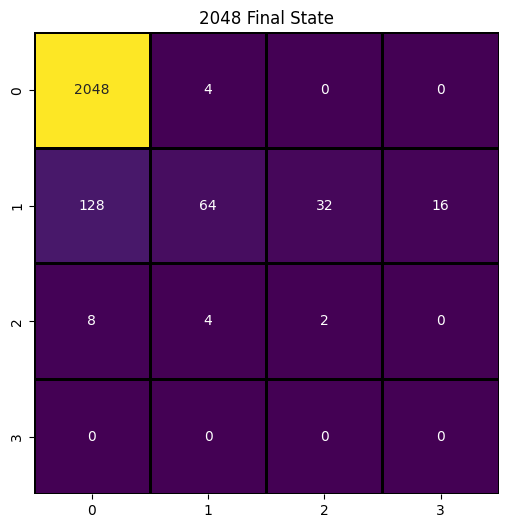

In [ ]:
import numpy as np
import random
from copy import deepcopy
import heapq
import matplotlib.pyplot as plt
import seaborn as sns

class Game2048:
    def __init__(self, size=4):
        self.size = size
        self.board = np.zeros((self.size, self.size), dtype=int)
        self.manual_start()

    def manual_start(self):
        # Manually set the board to a near-winning condition.
        self.board = np.array([
            [1024, 1024, 2, 2],
            [128, 64, 32, 16],
            [8, 4, 2, 0],
            [0, 0, 0, 0]
        ])

    def make_move(self, direction):
        # Move logic simplified with rotation and merge logic centralized.
        original = deepcopy(self.board)
        rotated = False
        if direction == 'up':
            self.board = np.rot90(self.board, -1)
            rotated = True
        elif direction == 'down':
            self.board = np.rot90(self.board, 1)
            rotated = True
        elif direction == 'right':
            self.board = np.fliplr(self.board)

        self.board = np.apply_along_axis(self.merge, 1, self.board)

        if rotated:
            if direction == 'up':
                self.board = np.rot90(self.board, 1)
            elif direction == 'down':
                self.board = np.rot90(self.board, -1)
        elif direction == 'right':
            self.board = np.fliplr(self.board)

        if not np.array_equal(original, self.board):
            self.add_random_tile()

    def merge(self, row):
        # Merge row elements with compression logic for 2048 game.
        non_zero = row[row != 0]  # remove all zeros
        merged = []
        skip = False
        for j in range(len(non_zero)):
            if skip:
                skip = False
                continue
            if j + 1 < len(non_zero) and non_zero[j] == non_zero[j + 1]:
                merged.append(2 * non_zero[j])
                skip = True
            else:
                merged.append(non_zero[j])
        return np.array(merged + [0] * (len(row) - len(merged)))

    def add_random_tile(self):
        # Normally adds a random tile, modified for controlled simulation.
        pass

    def is_win(self):
        # Check for winning condition in the game.
        return np.any(self.board == 2048)

    def clone(self):
        # Clone the game state.
        clone = Game2048(self.size)
        clone.board = deepcopy(self.board)
        return clone

def heuristic(board):
    max_tile = np.max(board)
    empty_tiles = len(board[board == 0])
    max_tile_position = np.unravel_index(np.argmax(board), board.shape)
    
    # Strongly encourage the max tile to be in the top-left corner
    if max_tile_position == (0, 0):
        position_bonus = 100  # Large bonus for correct positioning
    else:
        position_bonus = 0

    return (1.0 / max_tile) + empty_tiles - position_bonus

def a_star_search(game):
    open_list = []
    heapq.heappush(open_list, (heuristic(game.board), id(game), game.board.copy()))
    visited = set()
    visited.add(tuple(game.board.flatten()))

    while open_list:
        _, _, current_board = heapq.heappop(open_list)
        current_game = Game2048()
        current_game.board = np.array(current_board).reshape(game.size, game.size)

        if current_game.is_win() and np.unravel_index(np.argmax(current_game.board), current_game.board.shape) == (0, 0):
            return True, current_game

        for direction in ['up', 'down', 'left', 'right']:
            new_game = current_game.clone()
            new_game.make_move(direction)
            board_tuple = tuple(new_game.board.flatten())

            if board_tuple not in visited:
                visited.add(board_tuple)
                heapq.heappush(open_list, (heuristic(new_game.board), id(new_game), new_game.board.copy()))

    return False, current_game

# Initialize and run A* search
game = Game2048()
print("Initial board set near winning condition:")
print(game.board)

found, final_game = a_star_search(game)
if found:
    print("Success: 2048 achieved in the top-left corner.")
    print(final_game.board)
else:
    print("Failure: No solution found.")

# Display the grid using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(final_game.board, annot=True, fmt="d", cmap='viridis', cbar=False, linewidths=1, linecolor='black')
plt.title("2048 Final State")
plt.show()


**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

### A* Search

**Completeness:** A* search is complete in finite state spaces with finite costs if the heuristic function is admissible (i.e., never overestimates the cost to reach the goal).

**Optimality:** A* search is optimal if the heuristic function is admissible and consistent (i.e., satisfies the triangle inequality). It guarantees finding the optimal solution under these conditions.

**Efficiency Improvement:** Using an effective heuristic function is crucial for improving the efficiency of A* search. Additionally, pruning techniques such as alpha-beta pruning or implementing efficient data structures can enhance its performance.

### Greedy-Search (GS)

**Informed Search** : Focusses on the graph structure and the *distance from goal*, but not the *cost from start*.

Initial board set near winning condition:
[[1024 1024    2    2]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    0]]
Success: 2048 achieved in the top-left corner.
[[2048    4    0    0]
 [ 128   64   32   16]
 [   8    4    2    0]
 [   0    0    0    2]]


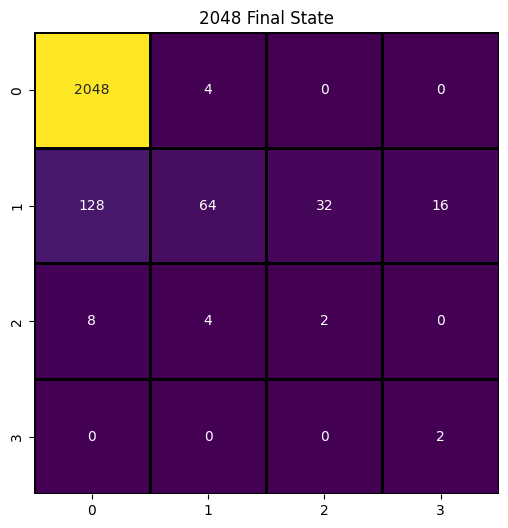

In [ ]:
import numpy as np
import random
from copy import deepcopy
import heapq
import matplotlib.pyplot as plt
import seaborn as sns

class Game2048:
    def __init__(self, size=4):
        self.size = size
        self.board = np.zeros((self.size, self.size), dtype=int)
        self.manual_start()

    def manual_start(self):
        self.board = np.array([
            [1024, 1024, 2, 2],
            [128, 64, 32, 16],
            [8, 4, 2, 0],
            [0, 0, 0, 0]
        ])

    def make_move(self, direction):
        original = deepcopy(self.board)
        if direction == 'up':
            self.board = np.rot90(self.board, -1)
        elif direction == 'down':
            self.board = np.rot90(self.board, 1)
        elif direction == 'right':
            self.board = np.fliplr(self.board)
        elif direction == 'left':
            self.board = np.apply_along_axis(self.merge, 1, self.board)

        self.board = np.apply_along_axis(self.merge, 1, self.board)

        if direction in ['up', 'down']:
            self.board = np.rot90(self.board, -1 if direction == 'down' else 1)
        elif direction == 'right':
            self.board = np.fliplr(self.board)

        if not np.array_equal(original, self.board):
            self.add_random_tile()

    def merge(self, row):
        non_zero = row[row != 0]
        merged = []
        skip = False
        for j in range(len(non_zero)):
            if skip:
                skip = False
                continue
            if j + 1 < len(non_zero) and non_zero[j] == non_zero[j + 1]:
                merged.append(2 * non_zero[j])
                skip = True
            else:
                merged.append(non_zero[j])
        return np.array(merged + [0] * (len(row) - len(merged)))

    def add_random_tile(self):
        empty = np.argwhere(self.board == 0)
        if len(empty) > 0:
            idx = random.choice(empty)
            self.board[tuple(idx)] = 4 if random.random() < 0.1 else 2

    def is_win(self):
        return np.any(self.board == 2048)

    def clone(self):
        clone = Game2048(self.size)
        clone.board = deepcopy(self.board)
        return clone

def heuristic(board):
    # Encourage the highest tile to be at the top-left corner
    max_tile = np.max(board)
    max_tile_position = np.unravel_index(np.argmax(board), board.shape)
    return -(max_tile + 100 * (max_tile_position == (0, 0)))

def greedy_best_first_search(game):
    open_list = []
    heapq.heappush(open_list, (heuristic(game.board), id(game), game.board.copy()))
    visited = set()
    visited.add(tuple(game.board.flatten()))

    while open_list:
        _, _, current_board = heapq.heappop(open_list)
        current_game = Game2048()
        current_game.board = np.array(current_board).reshape(current_game.size, current_game.size)

        if current_game.is_win():
            return True, current_game

        for direction in ['up', 'down', 'left', 'right']:
            new_game = current_game.clone()
            new_game.make_move(direction)
            board_tuple = tuple(new_game.board.flatten())

            if board_tuple not in visited:
                visited.add(board_tuple)
                heapq.heappush(open_list, (heuristic(new_game.board), id(new_game), new_game.board.copy()))

    return False, current_game

# Initialize and run Greedy Best-First Search
game = Game2048()
print("Initial board set near winning condition:")
print(game.board)

found, final_game = greedy_best_first_search(game)
if found:
    print("Success: 2048 achieved in the top-left corner.")
    print(final_game.board)
else:
    print("Failure: No solution found.")

# Display the grid using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(final_game.board, annot=True, fmt="d", cmap='viridis', cbar=False, linewidths=1, linecolor='black')
plt.title("2048 Final State")
plt.show()


**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

### Greedy Best-First Search

**Completeness:** Greedy best-first search is not complete because it may get stuck in loops or fail to explore parts of the state space.

**Optimality:** Greedy best-first search is not optimal because it makes decisions based solely on heuristic information without considering the entire cost of the path.

**Efficiency Improvement:** Balancing between exploration and exploitation by adjusting the heuristic function or incorporating limited backtracking can improve the efficiency of greedy best-first search.

**Conclusion**

In conclusion, we have explored a variety of search algorithms for solving the 2048 game. Each algorithm has its strengths and weaknesses, making them suitable for different scenarios.

**Breadth-First Search (BFS):** Guarantees the shortest path to the goal but can be memory-intensive due to its need to explore all possible moves at each level.

**Depth-First Search (DFS):** Memory-efficient but not guaranteed to find the shortest path. It may get stuck in deep branches before exploring closer solutions.

**Uniform Cost Search (UCS):** Finds the optimal solution in terms of cost but requires keeping track of the cost of each move, which can be complex in some scenarios.

**Iterative Deepening Search (IDS):** Combines the benefits of DFS and BFS, ensuring optimal solutions while avoiding excessive memory usage.

**Depth-Limited Search (DLS):** Similar to DFS but with a maximum depth limit to prevent getting stuck in deep branches. However, it may miss optimal solutions beyond the depth limit.

**Greedy Best-First Search:** Prioritizes nodes based on a heuristic function, which may lead to suboptimal solutions but is computationally efficient.

**A Search*:** Balances between the cost of the path and the heuristic estimation of the remaining cost, guaranteeing optimal solutions if the heuristic is admissible and consistent.

In practice, the choice of algorithm depends on various factors such as the problem size, memory constraints, and the availability of heuristic information. Experimentation with different algorithms and understanding their trade-offs is crucial for solving real-world problems efficiently.